# Introduction to Artificial Neural Networks and Deep Learning

## Overfitting and Best Practices


## How to make sure our model will behave well with new incoming data?

- Good performance on the training set, does not mean good performance on new data
- Often, the model just learnt "by hearth" the training set and it is giving rangom predictions on the test set
- Easy check: does your model contain more parameters than the instances in your training set ?


- it is **mandatory** to use a **validation set** at training time.
- the validation set is a subset of the training that is not used for learning the weights, but just for measure the quality of our model
  - it makes sense to have a development set to tune hyper-parameters, and then use the validation set *just once* to measure the final quality of our model

## Let's get back to the cifar dataset

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


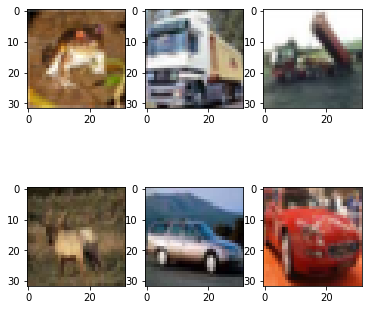

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


# view some of the images

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6,6))

axes[0,0].imshow(x_train[0])
axes[0,1].imshow(x_train[1])
axes[0,2].imshow(x_train[2])
axes[1,0].imshow(x_train[3])
axes[1,1].imshow(x_train[4])
axes[1,2].imshow(x_train[5])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

# initialize the network
model = Sequential()

model.add( Conv2D(32, (3, 3), input_shape=(32, 32, 3))) 
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Conv2D(64, (3, 3)) )
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Conv2D(64, (3, 3)) )
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Flatten() )
model.add( Dense(64) )
model.add( Activation("relu") )

model.add( Dense(10) )
model.add( Activation("softmax") )

# finalize the network
model.compile( optimizer="rmsprop",
               loss='categorical_crossentropy',
               metrics=['accuracy'] )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [ ]:
# train the network
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(y_train)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rescale=1./255, 
                                    validation_split= .2)

train_generator = train_datagen.flow(x_train, train_labels, 
                                     subset="training")
valid_generator = train_datagen.flow(x_train, train_labels, 
                                     subset="validation")


# train the network
hist = model.fit( x = train_generator, # training examples
                  epochs=10,        # number of training epochs 
                  validation_data  = valid_generator,
                  verbose=1)

Epoch 1/10
1250/1250 [==============================] - 19s 8ms/step - loss: 1.6485 - accuracy: 0.3955 - val_loss: 1.4018 - val_accuracy: 0.4988
Epoch 2/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2679 - accuracy: 0.5480 - val_loss: 1.1368 - val_accuracy: 0.6047
Epoch 3/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0932 - accuracy: 0.6169 - val_loss: 1.1003 - val_accuracy: 0.6132
Epoch 4/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9869 - accuracy: 0.6569 - val_loss: 0.9937 - val_accuracy: 0.6582
Epoch 5/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.8972 - accuracy: 0.6896 - val_loss: 0.9513 - val_accuracy: 0.6709
Epoch 6/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.8311 - accuracy: 0.7127 - val_loss: 0.9381 - val_accuracy: 0.6766
Epoch 7/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7743 - accuracy: 0.7311 - val_loss: 0.9791 - val_ac

In [ ]:
print ("Training:   ", model.evaluate(train_generator) )
print ("Validation: ", model.evaluate(valid_generator) )

1250/1250 [==============================] - 7s 6ms/step - loss: 0.5438 - accuracy: 0.8125
Training:    [0.5438376665115356, 0.8124750256538391]
313/313 [==============================] - 2s 6ms/step - loss: 0.9022 - accuracy: 0.6999
Validation:  [0.9021586179733276, 0.6998999714851379]


In [ ]:
# TODO: Exercise for you
#       Evaluate on the test set.
#       We do not need to use generators, as we want to know
#       what is the performance on the original test set

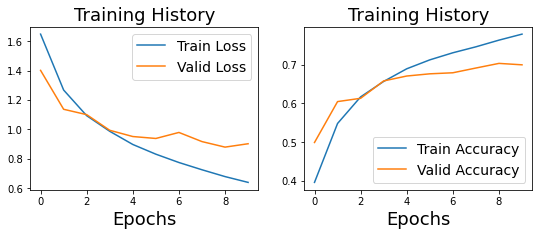

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot training epochs

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,3))

axes[0].plot(hist.history['loss'], label='Train Loss')
axes[1].plot(hist.history['accuracy'], label='Train Accuracy')

axes[0].plot(hist.history['val_loss'], label='Valid Loss')
axes[1].plot(hist.history['val_accuracy'], label='Valid Accuracy')

axes[0].set_title("Training History", fontsize=18)
axes[0].set_xlabel("Epochs", fontsize=18)
axes[1].set_title("Training History", fontsize=18)
axes[1].set_xlabel("Epochs", fontsize=18)
axes[0].legend(fontsize=14)
axes[1].legend(fontsize=14);


## You should see the following

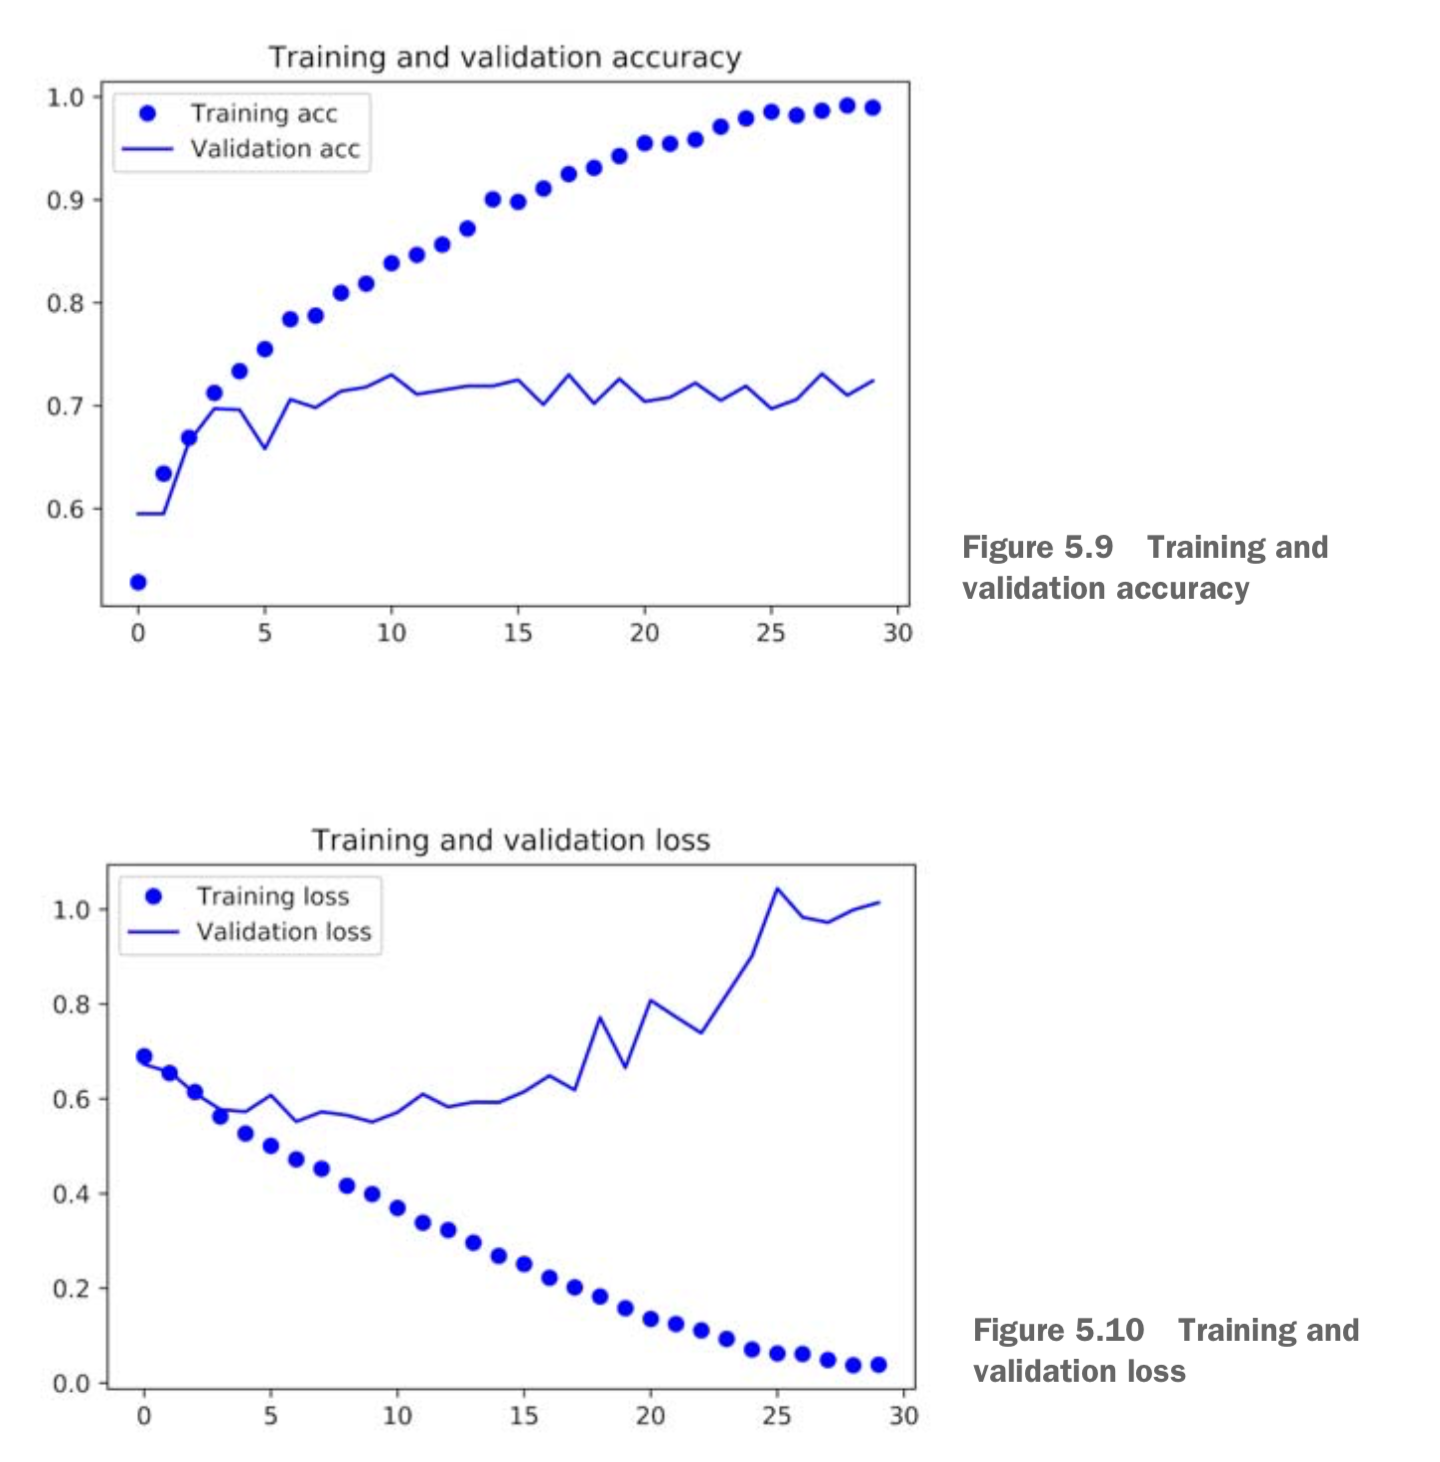

## The above is what we call overfitting

- the models continues to improve on the training set, but it gets worse on the validation set


- Reasons 1 could be in mismatch between the model/network and the data
  - the model is too complex and there are not enough data to properly tune the parameters
- Reasons 2 could be in mismatch between train and validation
  - the validation is so different from the training that no matter how well you train the error on the validation set will be large


- If we cannot simplify the model, we need to increase the data
  - In some domains, e.g. images, we can artificially generate reasonable data
     - translate/rotate/shift a picture
  - This is possible in most of the other domains, yet we need to be very careful
  

- This process is called **Data Augmentation**
  - see https://keras.io/api/preprocessing/image/#imagedatagenerator-class

In [ ]:
# train the network
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(y_train)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest', 
                                    validation_split= .2,)


train_generator = train_datagen.flow(x_train, train_labels, 
                                     subset="training")
valid_generator = train_datagen.flow(x_train, train_labels, 
                                     subset="validation")


- This is the effect

- Note that the network will never see the same image twice !

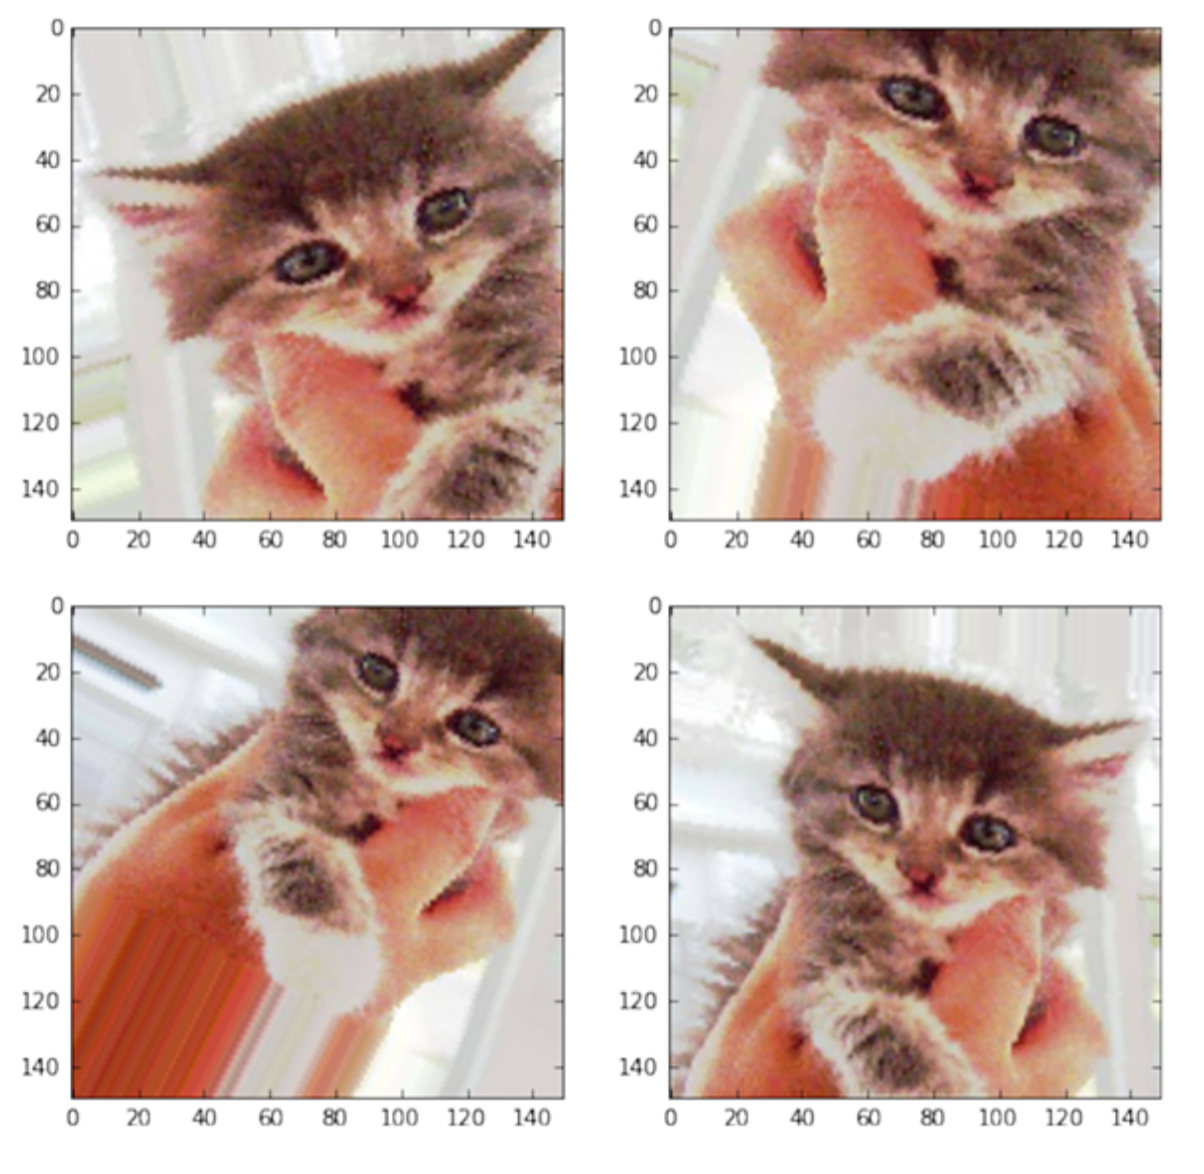

In [ ]:
# train the network
hist = model.fit( x = train_generator, # training examples
                  epochs=10,           # number of training epochs 
                  validation_data  = valid_generator,
                  verbose=1)


Epoch 1/10
1250/1250 [==============================] - 38s 30ms/step - loss: 1.4222 - accuracy: 0.4979 - val_loss: 1.3837 - val_accuracy: 0.5148
Epoch 2/10
1250/1250 [==============================] - 39s 31ms/step - loss: 1.3520 - accuracy: 0.5252 - val_loss: 1.4311 - val_accuracy: 0.5096
Epoch 3/10
1250/1250 [==============================] - 38s 31ms/step - loss: 1.3134 - accuracy: 0.5407 - val_loss: 1.2705 - val_accuracy: 0.5552
Epoch 4/10
1250/1250 [==============================] - 38s 30ms/step - loss: 1.2954 - accuracy: 0.5466 - val_loss: 1.3352 - val_accuracy: 0.5318
Epoch 5/10
1250/1250 [==============================] - 39s 31ms/step - loss: 1.2894 - accuracy: 0.5501 - val_loss: 1.4058 - val_accuracy: 0.5242
Epoch 6/10
1250/1250 [==============================] - 39s 31ms/step - loss: 1.2770 - accuracy: 0.5538 - val_loss: 1.2787 - val_accuracy: 0.5542
Epoch 7/10
1250/1250 [==============================] - 39s 31ms/step - loss: 1.2703 - accuracy: 0.5597 - val_loss: 1.2508 -

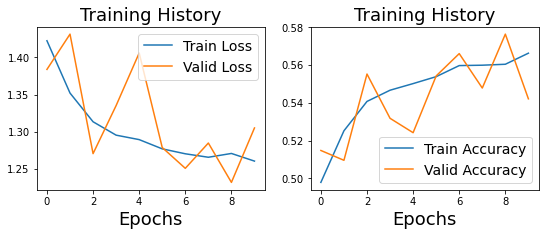

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot training epochs

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,3))

axes[0].plot(hist.history['loss'], label='Train Loss')
axes[1].plot(hist.history['accuracy'], label='Train Accuracy')

axes[0].plot(hist.history['val_loss'], label='Valid Loss')
axes[1].plot(hist.history['val_accuracy'], label='Valid Accuracy')

axes[0].set_title("Training History", fontsize=18)
axes[0].set_xlabel("Epochs", fontsize=18)
axes[1].set_title("Training History", fontsize=18)
axes[1].set_xlabel("Epochs", fontsize=18)
axes[0].legend(fontsize=14)
axes[1].legend(fontsize=14);

## You should see the following improvement

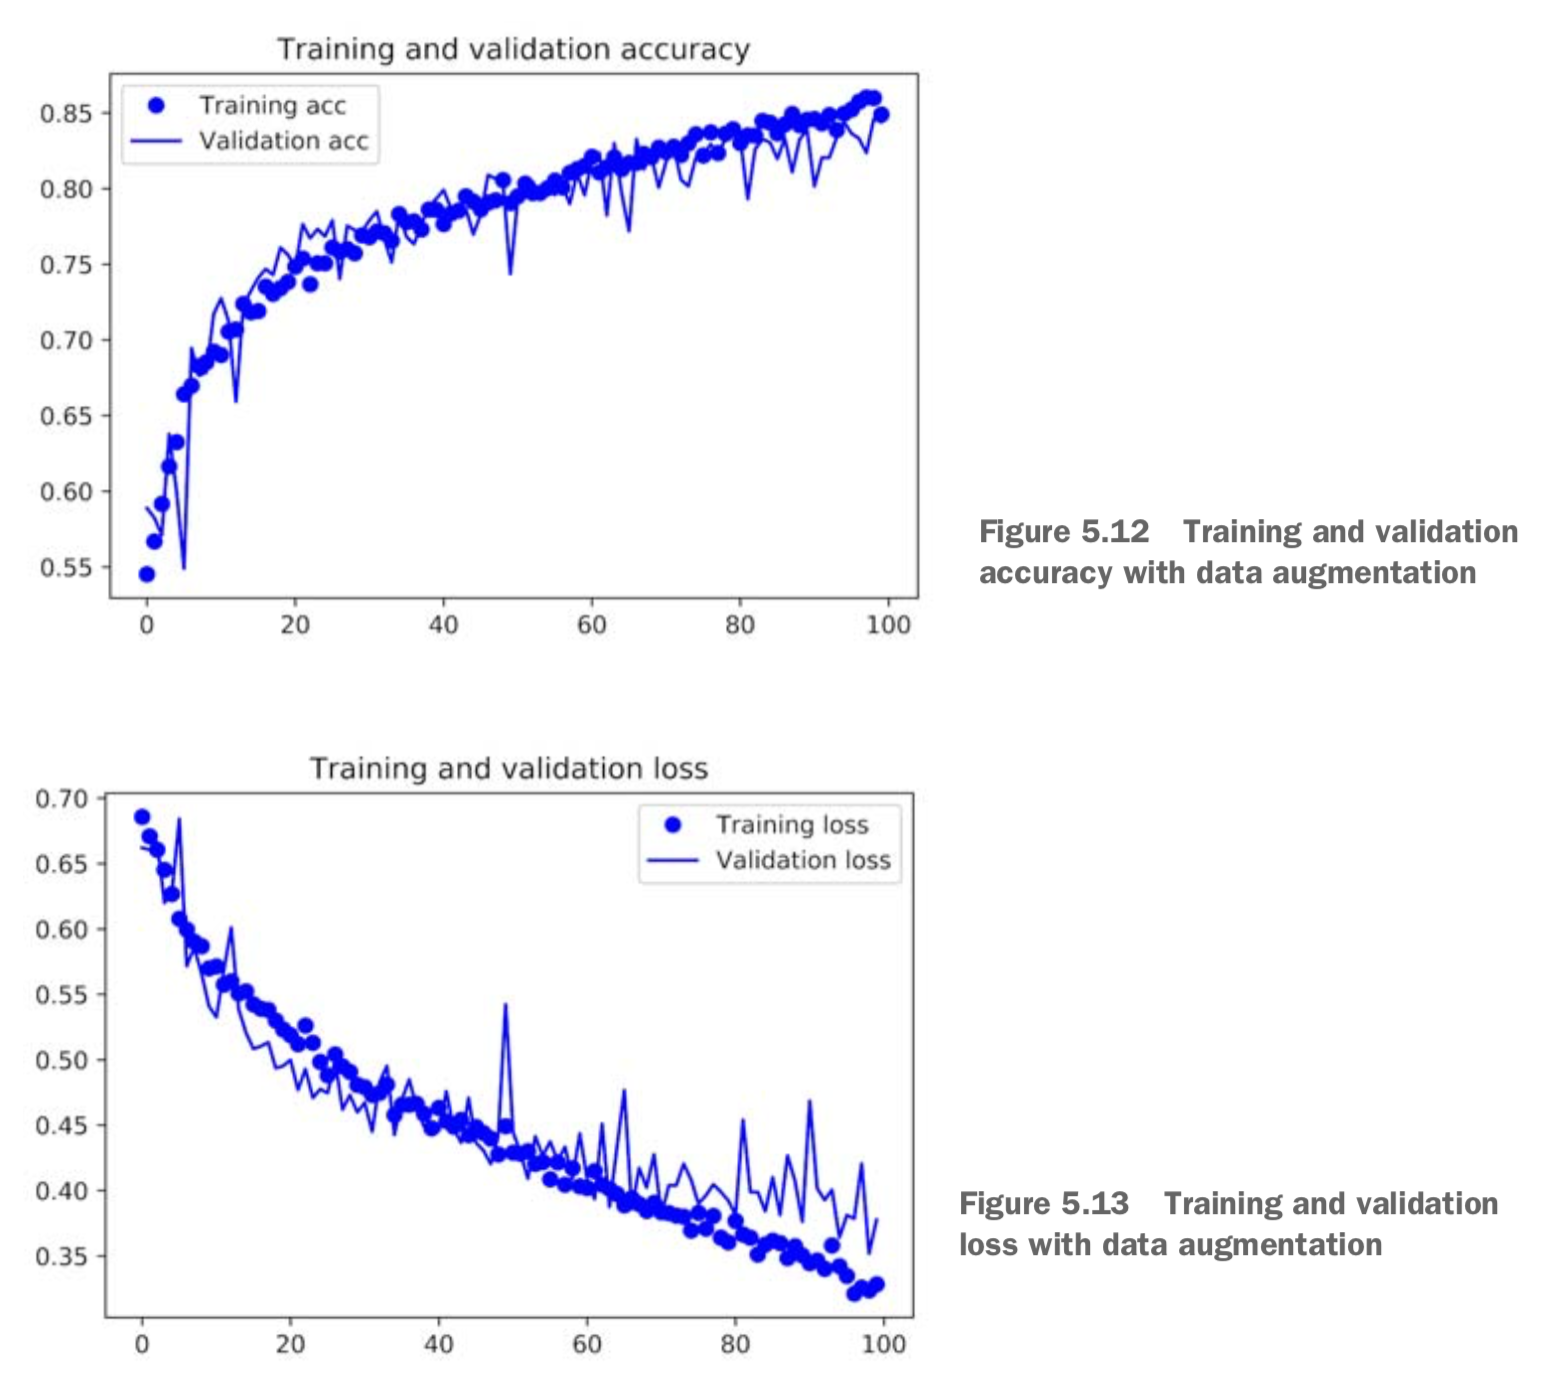

## Reducing overfitting with Dropout

- If generating more data is not sufficient, **dropout** is very useful to boost the learning of complex networks.


- We can avoid the network to overfit the training by introducing a special kind of noise.


- Dropout temporarily "mutes" for one iteration the outputs of a layer.


- This forces the next layer to avoid relying on those outputs and to find alternative ways to combine their signal.


- Dropout has a parameter specifying the amount of dropout. This is usually not tuned that much, values of 0.25 or 0.50 are ok.


- Note that dropout has no effect at test time


- Dropout in keras is added as an additional layer:
```python
     model.add(layers.Dropout(0.5))
```

- Typically before the last dense layers, but this is not a rule.


- Below the usual network with dropout included

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop

# initialize the network
model = Sequential()

model.add( Conv2D(32, (3, 3), input_shape=(32, 32, 3))) 
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Conv2D(64, (3, 3)) )
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Conv2D(64, (3, 3)) )
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )
### DROPOUT
model.add( Dropout(0.5) )

model.add( Flatten() )
model.add( Dense(64) )
model.add( Activation("relu") )
### DROPOUT
model.add( Dropout(0.5) )

model.add( Dense(10) )
model.add( Activation("softmax") )

# finalize the network
model.compile( optimizer="rmsprop",
               loss='categorical_crossentropy',
               metrics=['accuracy'] )

In [ ]:
# train the network
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(y_train)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest', 
                                    validation_split= .2,)


train_generator = train_datagen.flow(x_train, train_labels, 
                                     subset="training")
valid_generator = train_datagen.flow(x_train, train_labels, 
                                     subset="validation")


In [ ]:
# train the network
hist = model.fit( x = train_generator, # training examples
                  epochs=10,           # number of training epochs 
                  validation_data  = valid_generator,
                  verbose=1)


Epoch 1/10
1250/1250 [==============================] - 40s 31ms/step - loss: 2.0469 - accuracy: 0.2253 - val_loss: 1.8603 - val_accuracy: 0.2989
Epoch 2/10
1250/1250 [==============================] - 38s 30ms/step - loss: 1.8424 - accuracy: 0.3161 - val_loss: 1.7285 - val_accuracy: 0.3569
Epoch 3/10
1250/1250 [==============================] - 37s 30ms/step - loss: 1.7546 - accuracy: 0.3612 - val_loss: 1.6449 - val_accuracy: 0.4110
Epoch 4/10
1250/1250 [==============================] - 38s 30ms/step - loss: 1.7049 - accuracy: 0.3845 - val_loss: 1.6763 - val_accuracy: 0.4075
Epoch 5/10
1250/1250 [==============================] - 38s 30ms/step - loss: 1.6717 - accuracy: 0.4031 - val_loss: 1.5224 - val_accuracy: 0.4519
Epoch 6/10
1250/1250 [==============================] - 40s 32ms/step - loss: 1.6605 - accuracy: 0.4132 - val_loss: 1.6266 - val_accuracy: 0.4030
Epoch 7/10
1250/1250 [==============================] - 37s 29ms/step - loss: 1.6511 - accuracy: 0.4169 - val_loss: 1.5526 -

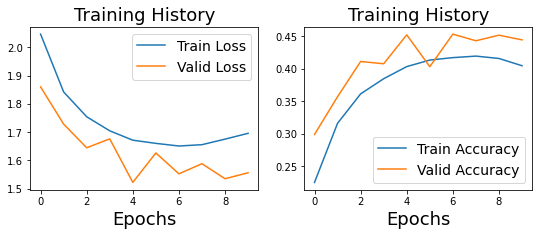

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot training epochs

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,3))

axes[0].plot(hist.history['loss'], label='Train Loss')
axes[1].plot(hist.history['accuracy'], label='Train Accuracy')

axes[0].plot(hist.history['val_loss'], label='Valid Loss')
axes[1].plot(hist.history['val_accuracy'], label='Valid Accuracy')

axes[0].set_title("Training History", fontsize=18)
axes[0].set_xlabel("Epochs", fontsize=18)
axes[1].set_title("Training History", fontsize=18)
axes[1].set_xlabel("Epochs", fontsize=18)
axes[0].legend(fontsize=14)
axes[1].legend(fontsize=14);

## Transfer Learning


- Not always we need to train a full network from scratch


- The network trained for a similar task can be fine-tuned for a new task


- This is called **Transfer Learning**


- In particular, the most successful image classification networks a readily available

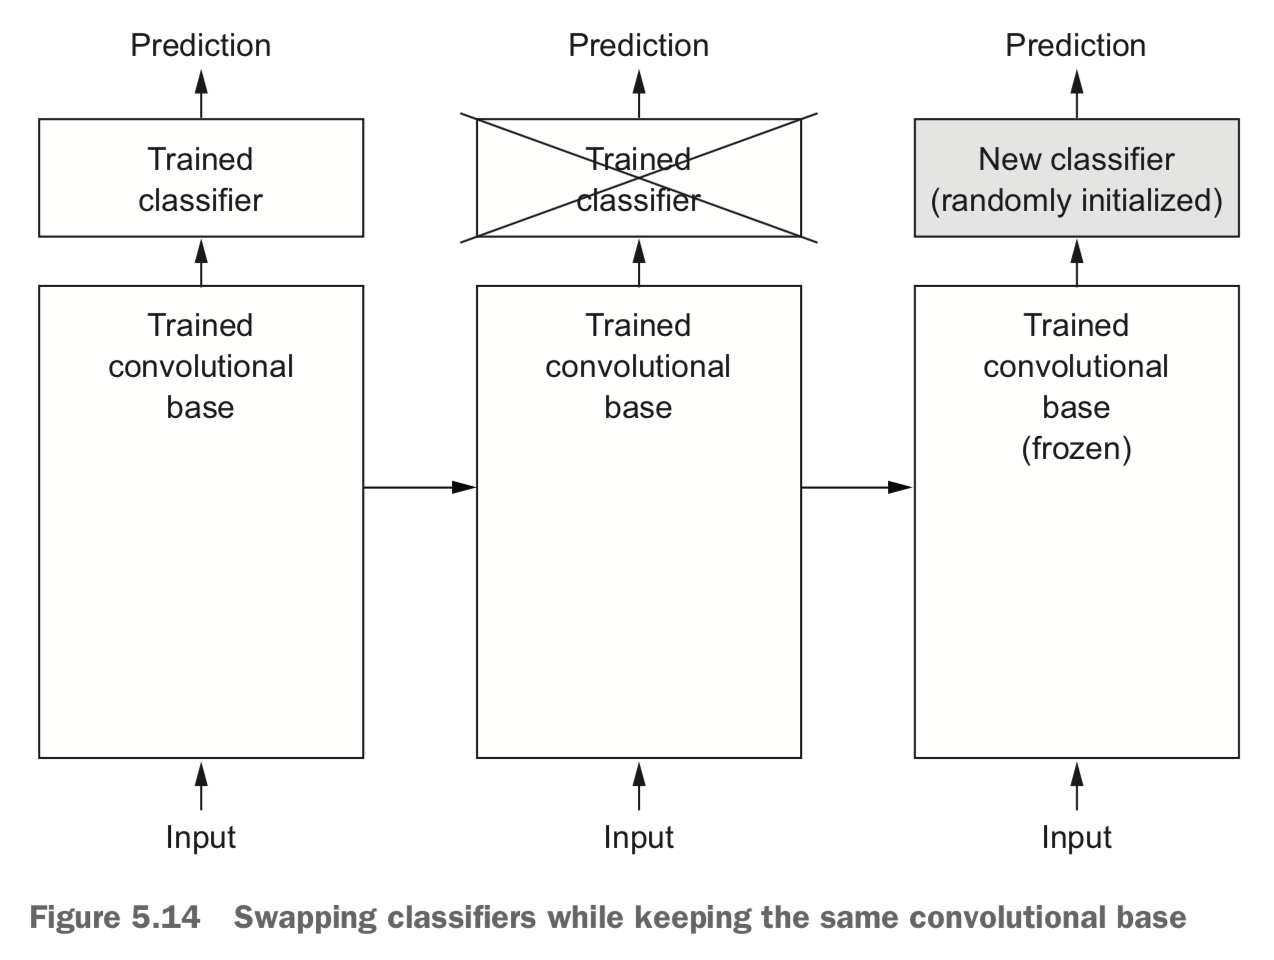

In [ ]:
from tensorflow.keras.applications import VGG16
vcg = VGG16(weights='imagenet',  # a benchmark dataset with 1000 classes
                  include_top=False,   # avoid the last densely connected layers
                  input_shape=(32, 32, 3)) # our image size

vcg.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

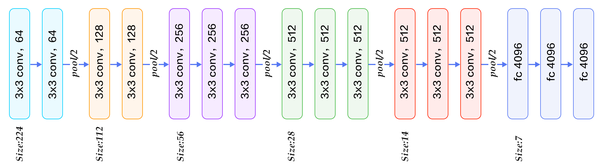

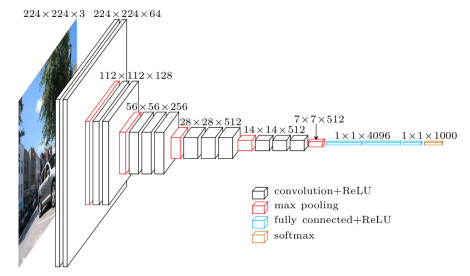

- Now I freeze these layers so that their weights do not change

In [ ]:
for i,layer in enumerate(vcg.layers):
    print (i, vcg.trainable)

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True


In [ ]:
for i,layer in enumerate(vcg.layers):
    layer.trainable = False

In [ ]:
vcg.output_shape

(None, 1, 1, 512)

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras import Model, Sequential

top_model = Sequential()
top_model.add(Flatten(input_shape=vcg.output_shape[1:]))
top_model.add(Dense(4096, activation='relu'))
top_model.add(Dropout(0.25))
top_model.add(Dense(10, activation='softmax'))
    
# link the two models
model = Model(inputs=vcg.input, outputs=top_model(vcg.output))

# finalize the network
model.compile( optimizer="rmsprop",
               loss='categorical_crossentropy',
               metrics=['accuracy'] )

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
for i,layer in enumerate(model.layers):
    print( i, layer.trainable )

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 True


In [ ]:
# train the network
hist = model.fit( x = train_generator, # training examples
                  epochs=10,           # number of training epochs 
                  validation_data  = valid_generator,
                  verbose=1)


Epoch 1/10
1250/1250 [==============================] - 43s 34ms/step - loss: 1.6647 - accuracy: 0.4090 - val_loss: 1.5620 - val_accuracy: 0.4395
Epoch 2/10
1250/1250 [==============================] - 42s 33ms/step - loss: 1.5321 - accuracy: 0.4594 - val_loss: 1.4665 - val_accuracy: 0.4797
Epoch 3/10
1250/1250 [==============================] - 41s 33ms/step - loss: 1.5052 - accuracy: 0.4752 - val_loss: 1.4800 - val_accuracy: 0.4829
Epoch 4/10
1250/1250 [==============================] - 42s 34ms/step - loss: 1.4854 - accuracy: 0.4817 - val_loss: 1.4356 - val_accuracy: 0.4985
Epoch 5/10
1250/1250 [==============================] - 42s 34ms/step - loss: 1.4886 - accuracy: 0.4865 - val_loss: 1.4735 - val_accuracy: 0.4992
Epoch 6/10
1250/1250 [==============================] - 42s 33ms/step - loss: 1.4767 - accuracy: 0.4919 - val_loss: 1.4609 - val_accuracy: 0.4975
Epoch 7/10
1250/1250 [==============================] - 41s 33ms/step - loss: 1.4808 - accuracy: 0.4913 - val_loss: 1.4910 -

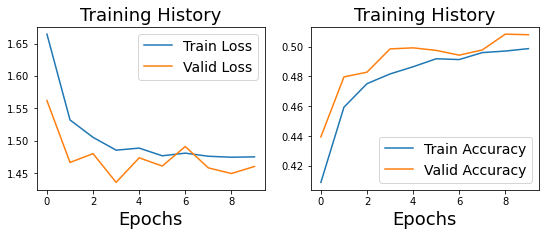

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot training epochs

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,3))

axes[0].plot(hist.history['loss'], label='Train Loss')
axes[1].plot(hist.history['accuracy'], label='Train Accuracy')

axes[0].plot(hist.history['val_loss'], label='Valid Loss')
axes[1].plot(hist.history['val_accuracy'], label='Valid Accuracy')

axes[0].set_title("Training History", fontsize=18)
axes[0].set_xlabel("Epochs", fontsize=18)
axes[1].set_title("Training History", fontsize=18)
axes[1].set_xlabel("Epochs", fontsize=18)
axes[0].legend(fontsize=14)
axes[1].legend(fontsize=14);

### Disclaimer

**You should run all of the above for a reasonable number of iterations.**

---
---

#  The Deep Learning Workflow in 10 recommendations

1. **Choosing a measure of Quality**:
  - You may actually have 2: One is you personal objective, and one is some close mathematical formulation
  - This is fundamental to be able to evaluate the steps along your investigation path
  

2. **Fixing evaluation protocol**:
  - Always use a validation set
  - Better than that, use also a development set
  

3. **Prepare you data**:
   - transform your data in a matrix of observations $\times$ features, 
     - remove strings, fix Nans, use floats ...
   - and a vector of desired output


4. **Find the trivial baseline**:
   - what's the laziest strategy? what's the score of predicting the majority class?
   
   
5. **Find a better baseline**:
   - e.g., linear regression
   - or some very simple strategy (maybe coming from your domain knowledge)
      - e.g., tomorrow's prices will be the same as today
      

6. **Now you can start setting up your network**:
   - loss function ?
      - you may need to fix the vector of desired outputs after this
   - activation function of the last layer ?
   - you may use `relu` everywhere else
   - you may use `rmsprop` optimizer
   - build a simple and compact network
   
   
7. **Build a model that overfits**:
   - we want to have very good score on the training to make sure that the network is powerful enough
   - add layers
   - add neurons
   - increase epochs
   
   
8. **Solve Overfitting**:
   - now that the network is powerful enough, we can attack overfitting
   - add dropout
   - add more data if possible
   - simplify the network if possible


9. **Iterate if necessary**:
   - better not to get into this loop, but you may need to go back to step 7.
   - if you use several times the validation set to find the best hyperparameters, you have a good chance you are overfitting to the validation set. consider a development set for this, and use the validation to compare stable solutions
   
   
10. **You are done!**:
   - get the best model you crafted so far
   - put together all the data you have (train, valid, other)
   - launch a large training and leave it running overnight
   - **It's late! leave the office!**



   
   
   
   


